In [1]:
"""
full dataset

------------------------------------------------------------------------------------------------
|                                                                                              |
------------------------------------------------------------------------------------------------

regular splitting

------------------------------------------------------------------------------------------------
|                              70%                                  |    15%          |       15%         |
------------------------------------------------------------------------------------------------

Cross Validation

------------------------------------------------------------------------------------------------
|      1          |          2     |       3        |        4        |        5        |        6        |
------------------------------------------------------------------------------------------------
"""

'\nfull dataset\n\n------------------------------------------------------------------------------------------------\n|                                                                                              |\n------------------------------------------------------------------------------------------------\n\nregular splitting\n\n------------------------------------------------------------------------------------------------\n|                              70%                                  |    15%          |       15%         |\n------------------------------------------------------------------------------------------------\n\nCross Validation\n\n------------------------------------------------------------------------------------------------\n|      1          |          2     |       3        |        4        |        5        |        6        |\n------------------------------------------------------------------------------------------------\n'

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
                                    StratifiedKFold, 
                                    cross_validate
                                    )
from sklearn.metrics import (
                            confusion_matrix, 
                            f1_score,
                            accuracy_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

### 1. Load the data

In [3]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### 2. Configure k-Fold CV

In [ ]:
#cv = cross-validation
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
                    )

In [5]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )

In [6]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='precision',
                            return_train_score=False
                            )

In [7]:
cv_results

{'fit_time': array([0.0171771 , 0.00526094, 0.00508499, 0.00470591, 0.00447679,
        0.00456381]),
 'score_time': array([0.00191808, 0.00090694, 0.00086212, 0.00076795, 0.00083995,
        0.00075412]),
 'test_score': array([0.74      , 0.70813845, 0.72829132, 0.74098672, 0.72488263,
        0.73030584])}

In [8]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']
for score in score_arr:
    cv_results = cross_validate(
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv, scoring=score,
                                return_train_score=False
                                )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)

    print(f"{score} : {test_score_avg}")

accuracy : 0.7306608765891984
precision : 0.728767491464764
recall : 0.7349241825841353
f1 : 0.7318169755021501


In [ ]:
cv_results = cross_validate(
                            model_lr,
                            X_train, Y_train,
                            cv=cv, scoring='f1',
                            return_train_score=False
                            )
cv_results
#In here, test_score means the score of the model on the validation set at each fold.

{'fit_time': array([0.00761509, 0.00707817, 0.00562096, 0.00516701, 0.00481415,
        0.00453401]),
 'score_time': array([0.00215983, 0.0010829 , 0.00096297, 0.00084901, 0.00075006,
        0.00069094]),
 'test_score': array([0.73789174, 0.71247059, 0.73377234, 0.74063537, 0.72795851,
        0.7381733 ])}

In [ ]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, Y_train))
fold_indices

[(array([    0,     1,     2, ..., 12665, 12666, 12667], shape=(10556,)),
  array([    5,    15,    23, ..., 12655, 12658, 12663], shape=(2112,))),
 (array([    2,     3,     5, ..., 12664, 12665, 12667], shape=(10556,)),
  array([    0,     1,     4, ..., 12651, 12661, 12666], shape=(2112,))),
 (array([    0,     1,     3, ..., 12665, 12666, 12667], shape=(10557,)),
  array([    2,    10,    18, ..., 12653, 12659, 12664], shape=(2111,))),
 (array([    0,     1,     2, ..., 12664, 12666, 12667], shape=(10557,)),
  array([   11,    13,    22, ..., 12646, 12656, 12665], shape=(2111,))),
 (array([    0,     1,     2, ..., 12665, 12666, 12667], shape=(10557,)),
  array([    6,     7,     8, ..., 12648, 12657, 12660], shape=(2111,))),
 (array([    0,     1,     2, ..., 12664, 12665, 12666], shape=(10557,)),
  array([    3,    16,    24, ..., 12654, 12662, 12667], shape=(2111,)))]

In [22]:
best_train_idx, best_test_idx = fold_indices[best_index]
print(best_train_idx)
print("==============")
print(best_test_idx)

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

[    0     1     2 ... 12664 12666 12667]
[   11    13    22 ... 12646 12656 12665]


In [16]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )
model_lr.fit(X_train_best, Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [18]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [19]:
print(f"accuracy : {accuracy}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1_score : {f1_score}")

accuracy : 0.6948474237118559
precision : 0.3392857142857143
recall : 0.6569148936170213
f1_score : 0.447463768115942


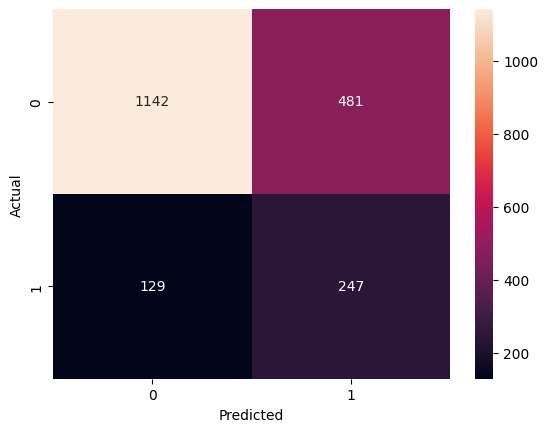

In [20]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()